<a href="https://colab.research.google.com/github/LouisCMS/Scoring-training/blob/master/scoring_newkarak_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEAD SCORING FOR NEWKARAK**

---




##  *-- Click "open this Notebook in draft mode" in the upper left to be able to run cells --* 

# The society  « Newkarak » is launching a **new type of karaoke worldwide.** 

They are launching a new **disruptive concept** with both online karaoke rooms and physical clubs for karaoke lovers. They only work with **monthly subscription** and aim to become the Netflix of karaoke.
From data collected through online surveys on their prospects, **they want Ekimetrics to help them target their online prospects** with the best possible performance.
At your last Eki-event, your CEO understood that you where killing the game in terms of karaoke. Hence he put you in charge of this **lead scoring project**. 

**Are you up to it ?**

![](https://media.giphy.com/media/kKJ8YFi1VVhHFudiz2/giphy.gif)


## Settings and libraries 

In [0]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import os
import time
from tqdm import tqdm_notebook

# visulaisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<script>$('div.cell.selected').next().height(100);</script>"))

# Jupyter widgets
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Button clicked.")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Click Me!', style=ButtonStyle())

Output()

In [0]:
answer_q1 = widgets.BoundedIntText(
    min=0,
    max=10,
    value=0,
    step=1,
    description='Your answer:',
    disabled=False
)

translate_q1 = {
    1:"obispo",
    7:"dion"
}

If you have an error here (for example ``ModuleNotFoundError: No module named 'seaborn'``) don't forget to install every modules. <br>
For that, create a new cell and type <br>```!pip install seaborn```<br>It should work afterward when you re-run the import cell

## 1. Data extraction and aggregation

## Downloading the data

In [1]:
!git clone https://github.com/LouisCMS/Scoring-training.git

Cloning into 'Scoring-training'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [0]:
data_url = 'https://raw.githubusercontent.com/LouisCMS/Scoring-training/master/table-processed.csv'
table = pd.read_csv(data_url)
# Dataset is now stored in a Pandas Dataframe

In [0]:
table=table.drop([0,1]).reset_index(level = 0).drop('index',axis=1)

In [0]:
table

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,How did you hear about NewKarak,What is your current occupation,Receive More Updates About Our Courses,Last Notable Activity,Converted,Prospect ID,Selected,Selected (1),Selected (2)
0,Landing Page Submission,Direct Traffic,Yes,2.0,365.0,2.0,Came to Noche and sung Maitre Gims,Heard at the Bowler,Reg,No,Came to Noche and sung Maitre Gims,0,9f0fac80-4bad-4240-a45f-d5260b963f1b,No,No,No
1,Nothing,Olark Chat,No,0.0,0.0,0.0,Chat Conversation,Heard at the Bowler,Reg,No,Other,0,9e238a96-0c5c-46ce-b225-770d1cb58181,No,No,No
2,Landing Page Submission,Google,No,4.0,176.0,2.0,Email Opened,Online Search,Reg,No,Other,0,53dd16bd-8201-448d-8e20-97de1cf44a7f,No,No,No
3,Landing Page Submission,Organic Search,Yes,2.0,387.0,2.0,Came to Noche and sung Maitre Gims,Heard at the Bowler,Reg,No,Other,0,6b74c48f-78de-48be-b5f4-5304880b2877,No,No,No
4,Nothing,Organic Search,No,1.0,143.0,1.0,"Came to Noche and sung ""Country Home""",Heard at the Bowler,Reg,No,Other,0,403e80b7-da91-486d-981a-a3db2acd267d,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,Nothing,Direct Traffic,No,13.0,1409.0,2.6,SMS Sent,Heard at the Bowler,Reg,No,SMS Sent,1,3f715465-2546-47cd-afa8-8b8dc63b8b43,NaN,No,No
6852,Landing Page Submission,Direct Traffic,No,5.0,210.0,2.5,SMS Sent,Heard at the Bowler,Reg,No,Other,1,c0b25922-511f-4c56-852e-ced210a45447,NaN,No,No
6853,Landing Page Submission,Direct Traffic,Yes,8.0,1845.0,2.67,Came to Noche and sung Maitre Gims,Heard at the Bowler,Reg,No,Came to Noche and sung Maitre Gims,1,19d6451e-fcd6-407c-b83b-48e1af805ea9,NaN,No,No
6854,Landing Page Submission,Google,No,3.0,499.0,3.0,SMS Sent,Online Search,NaN,No,SMS Sent,1,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,NaN,No,No


In [0]:
#@title
# Test de checkbox pour les checks
widgets.Checkbox(
    value=True,
    description='Missing values checked',
    disabled=False
)

Checkbox(value=True, description='Missing values checked')

## 2. Data cleansing and preprocessing

### Data exploration (EDA)

In [0]:
def plot_occurence(column):
    plt.figure(figsize=(20,5))
    plt.title(column)
    sns.countplot(table[column])
    plt.show()

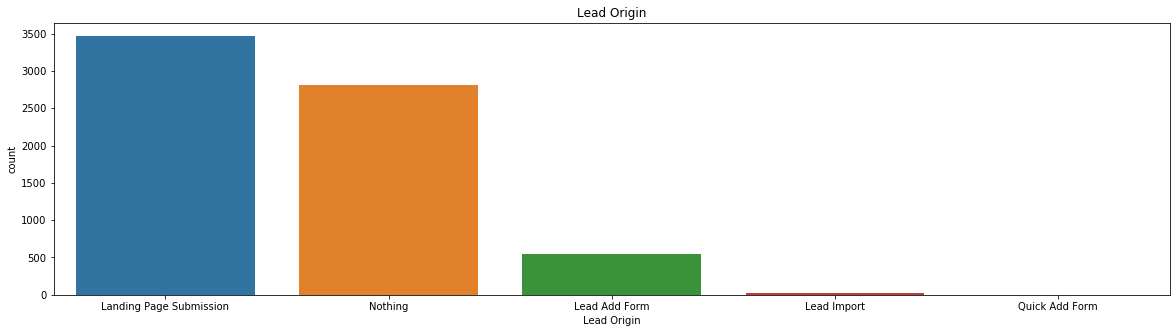

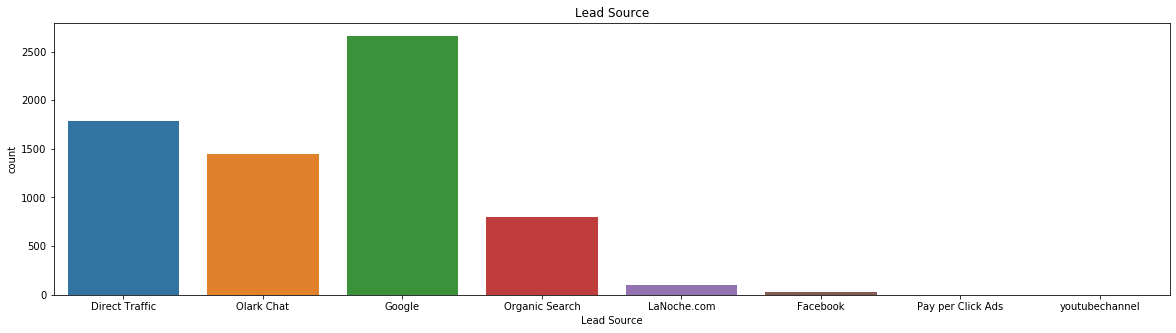

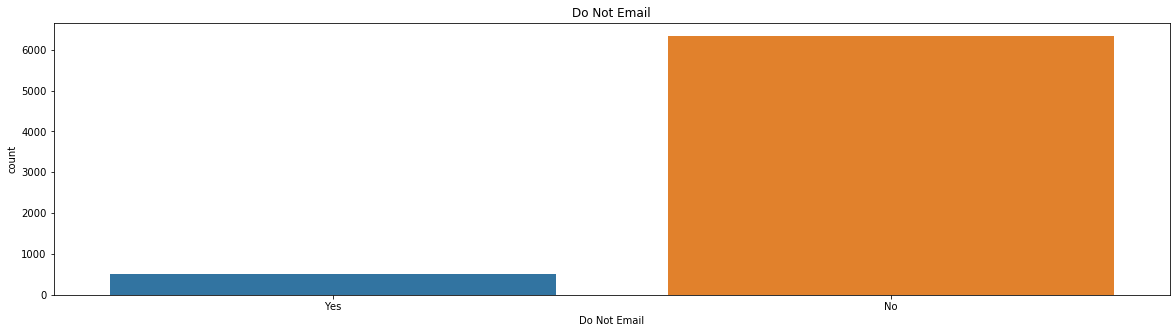

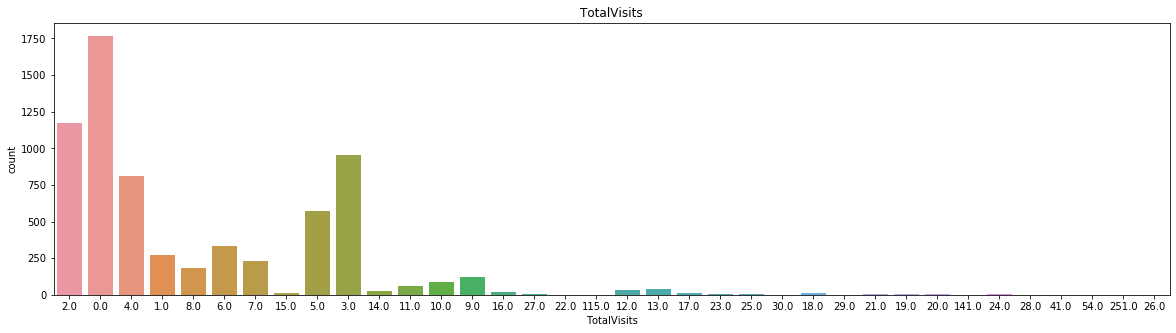

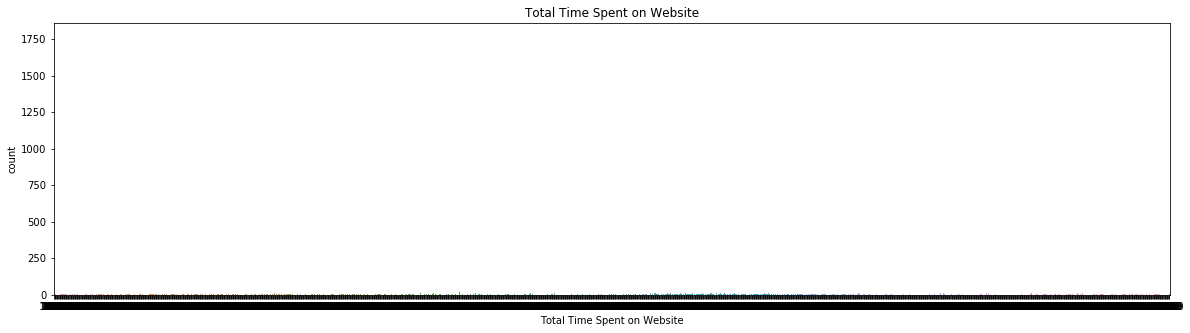

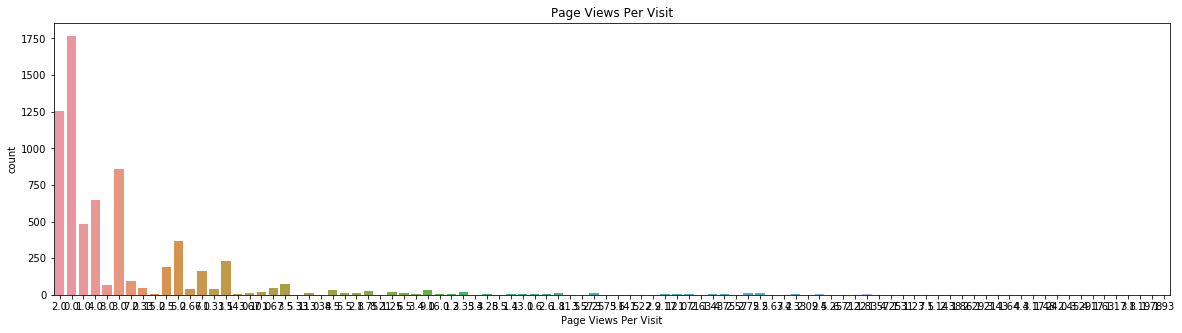

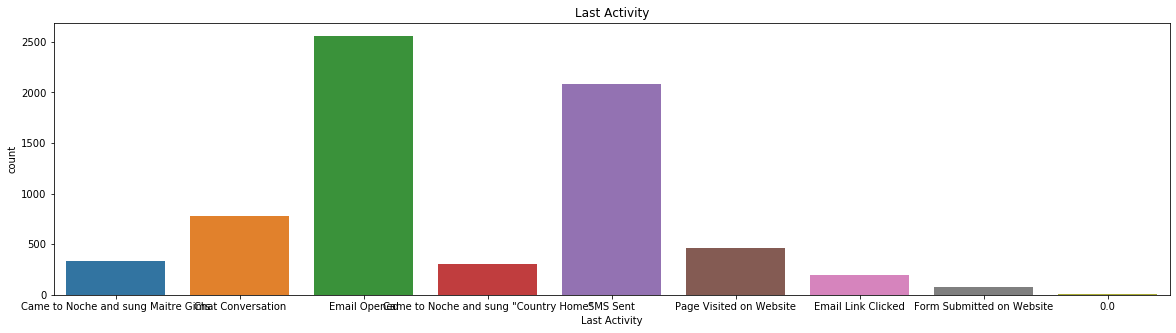

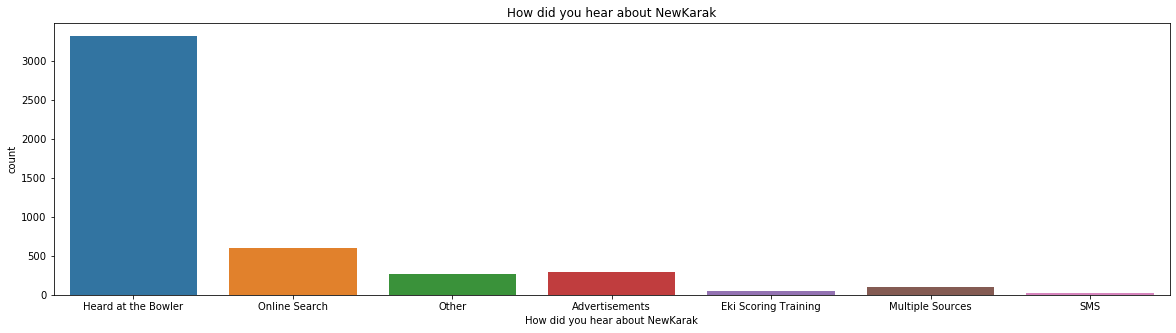

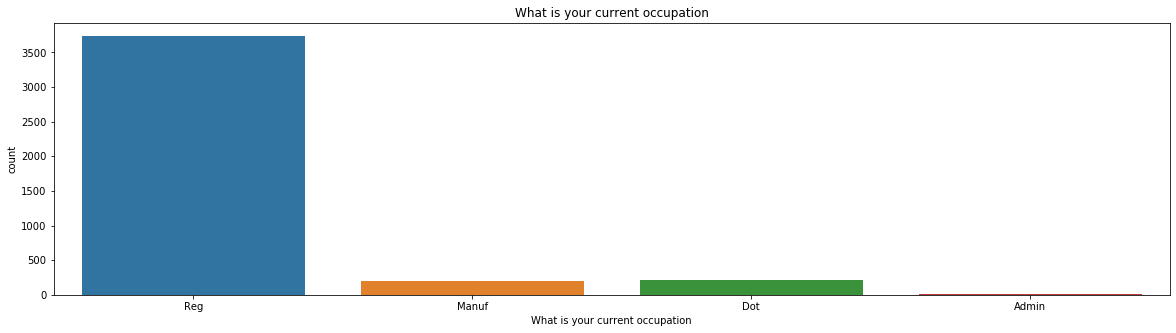

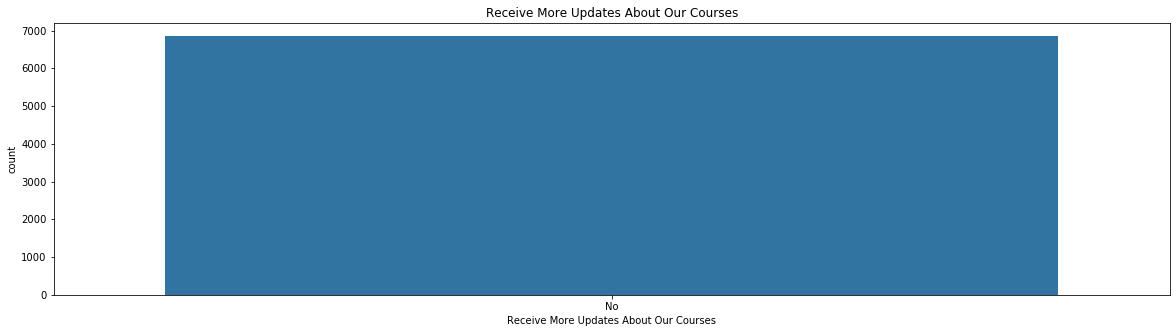

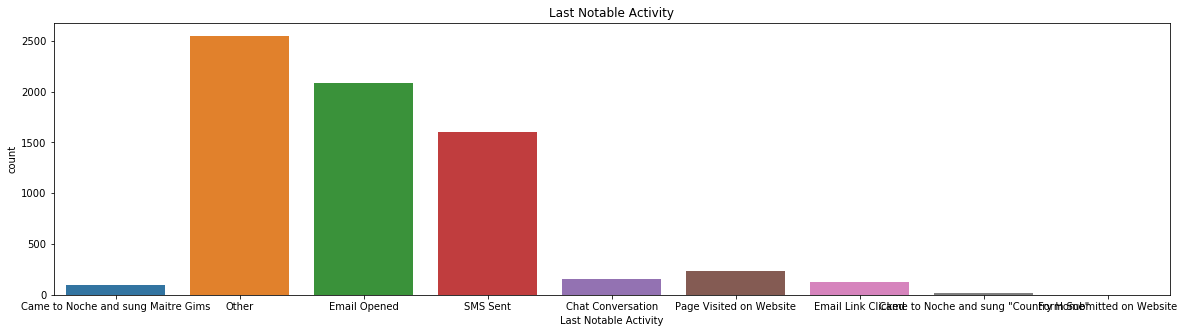

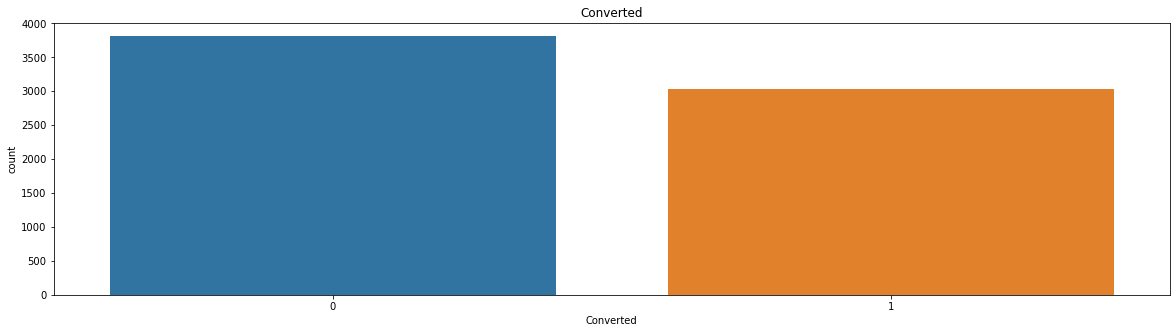

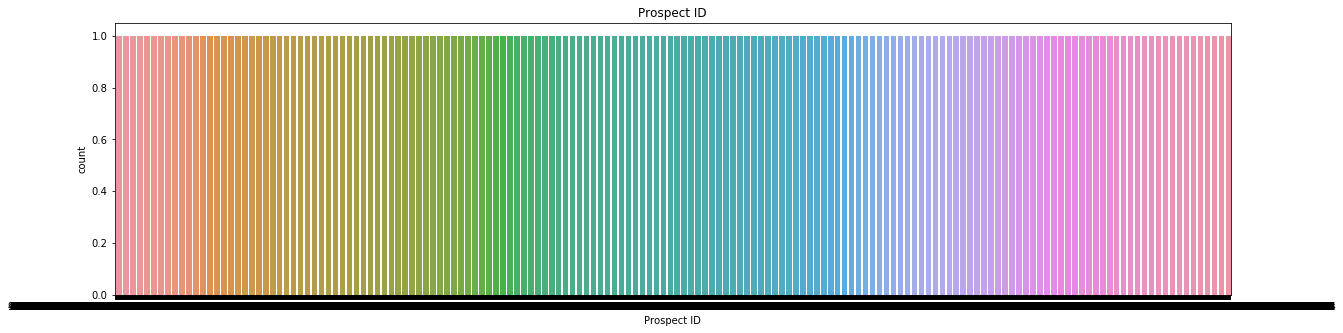

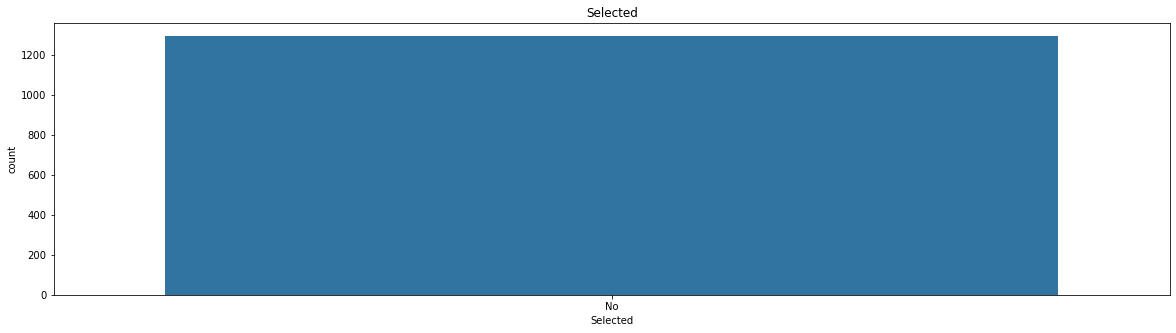

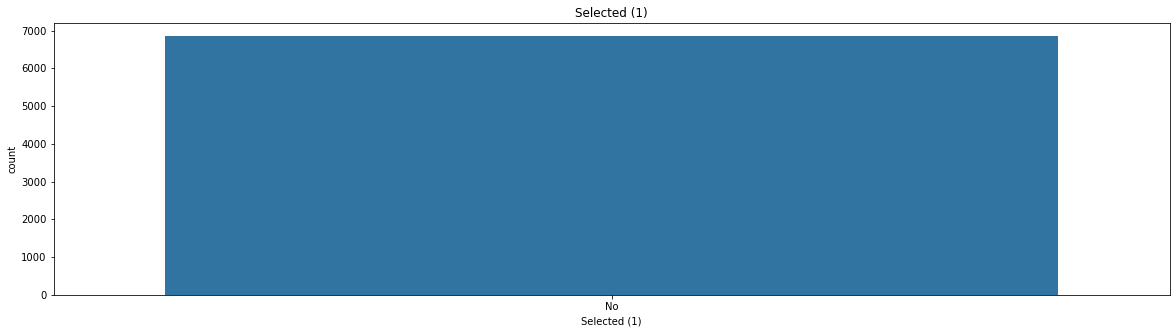

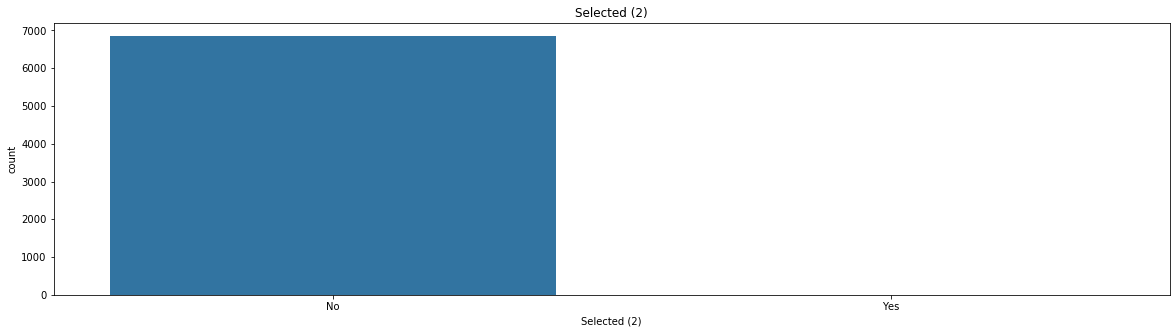

In [0]:
for c in table.columns:
    plot_occurence(c)

### Empty & NaN values

Is there any column with empty (`NaN`/`None`) values?

In [0]:
table.isnull().sum()

### Question 1 :

Time for the first quizz.
You worked on your dataset and did all the preprocessing work. 
What are the number of categories in the variable "XXX" ?

Type your answer in 360 learning



### Define your variables/features

In [0]:
table=table.apply(pd.to_numeric, errors='ignore')

In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_num = table.select_dtypes(include=numerics).drop('Converted',axis=1)

In [0]:
# Columns definition
COLUMNS=table.columns
TARGET=['Converted']
NUMERICAL=[*cols_num]
# Catégorical : everything that is not in numerical and in target
cat_cols =[*COLUMNS[~COLUMNS.isin([*NUMERICAL,*TARGET,*TO_DROP])]]

In [0]:
table[[*TARGET,*NUMERICAL,*CATEGORICAL]]

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,Do Not Email,Last Activity,How did you hear about NewKarak,What is your current occupation,Receive More Updates About Our Courses,Last Notable Activity
0,0,2.0,365.0,2.00,Landing Page Submission,Direct Traffic,Yes,Came to Noche and sung Maitre Gims,Heard at the Bowler,Reg,No,Came to Noche and sung Maitre Gims
1,0,0.0,0.0,0.00,Nothing,Olark Chat,No,Chat Conversation,Heard at the Bowler,Reg,No,Other
2,0,4.0,176.0,2.00,Landing Page Submission,Google,No,Email Opened,Online Search,Reg,No,Other
3,0,2.0,387.0,2.00,Landing Page Submission,Organic Search,Yes,Came to Noche and sung Maitre Gims,Heard at the Bowler,Reg,No,Other
4,0,1.0,143.0,1.00,Nothing,Organic Search,No,"Came to Noche and sung ""Country Home""",Heard at the Bowler,Reg,No,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
6851,1,13.0,1409.0,2.60,Nothing,Direct Traffic,No,SMS Sent,Heard at the Bowler,Reg,No,SMS Sent
6852,1,5.0,210.0,2.50,Landing Page Submission,Direct Traffic,No,SMS Sent,Heard at the Bowler,Reg,No,Other
6853,1,8.0,1845.0,2.67,Landing Page Submission,Direct Traffic,Yes,Came to Noche and sung Maitre Gims,Heard at the Bowler,Reg,No,Came to Noche and sung Maitre Gims
6854,1,3.0,499.0,3.00,Landing Page Submission,Google,No,SMS Sent,Online Search,NaN,No,SMS Sent


In [0]:
pd.Categorical(table['Lead Origin'])

[Landing Page Submission, Nothing, Landing Page Submission, Landing Page Submission, Nothing, ..., Nothing, Landing Page Submission, Landing Page Submission, Landing Page Submission, Landing Page Submission]
Length: 6856
Categories (5, object): [Landing Page Submission, Lead Add Form, Lead Import, Nothing, Quick Add Form]

In [0]:
#cette fonction permet de couper les variables a plus de 5 catégories et mettre toutes les autres dans other
# regarder combien tombent dans "other" et positionner le curseur selon sens métier
def transform_cat_variable(series,max_cats):
    
    # Compute the count of the occurences in the categories
    count = series.value_counts().index.tolist()
    if len(count) > max_cats:
        count = count[:max_cats] + ["Other"]
        # Create the categories
        return pd.Categorical(series,categories = count).fillna("Other")
#         print(series+' has been transformed')
    else:
        return pd.Categorical(series,categories = count)

In [0]:
table_2=table.copy()
# Prepare categorical variables
for var in CATEGORICAL:
    table_2[var] = transform_cat_variable(table[var],max_cats = 5)

In [0]:
dummies=pd.get_dummies(table[CATEGORICAL])
table_dum=pd.concat([table[[*TARGET,*NUMERICAL,*CATEGORICAL]].drop(columns=CATEGORICAL),dummies],axis=1)
COLUMN_DUM=table_dum.columns
CATEGORICAL_DUM=COLUMN_DUM[~COLUMN_DUM.isin([*TARGET,*NUMERICAL])]

In [0]:
table_dum=table_dum.dropna(axis='index')

In [0]:
cat_cols = [
    'workclass',
    'education',
    'sex',
]

num_cols = [
    'age',
    'capital-gain',
    'hours-per-week'
]

target_col = 'revenue'

### Preparing and preprocessing data

Based on the type you gave to each column, we are going to preprocess each of them to clean the data.

Here we will :

- Convert to dummies categorical variables
- Do nothing to numerical variables (could be interesting to normalize them)
- Create a simple function to do all those steps automatically

In [0]:
from sklearn.model_selection import train_test_split

def preproc(data,cat_cols,num_cols,target_col,test_size = 0.2):
    
    # Convert categorical variables to dummies (1 and 0)
    data_cat = pd.get_dummies(data[cat_cols])
    
    # Keep the numerical columns
    data_num = data[num_cols]
    
    # Concat the num and cat data
    X = pd.concat([data_num, data_cat], axis=1)
    
    # Prepare target variable
    mapping_target = {' >50K':1,' <=50K':0}
    y = data[target_col].map(mapping_target).values
    
    # Split the dataset in train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test    

In [0]:
X_train, X_test, y_train, y_test = preproc(train,cat_cols,num_cols,target_col,test_size = 0.2)

NameError: name 'train' is not defined

In [0]:
print(X_train.shape)
X_train.head()

NameError: name 'X_train' is not defined

## 3. Machine Learning


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## 4. Performance measurement
